In [115]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

# Correção dos dados para visualização

In [116]:
def idade(df):
    df.loc[(df['IDADE']<400),'IDADE'] = 0
    df.loc[(df['IDADE']>=400)&(df['IDADE']<500),'IDADE'] = df['IDADE']-400
    df.loc[(df['IDADE']>500),'IDADE'] = df['IDADE']-400
    return df

def data_obito(df):
    df['DTOBITO'] = df['DTOBITO'].astype(str)
    df['Ano'] = df['DTOBITO'].apply(lambda x: int(x[-4:]))
    df['Mes'] = df['DTOBITO'].apply(lambda x: int(x[-6:-4]))
    return df

def raca(df):
    df.loc[(df['RACACOR']==1),'RACACOR'] = 'Branca'
    df.loc[(df['RACACOR']==2),'RACACOR'] = 'Preta'
    df.loc[(df['RACACOR']==3),'RACACOR'] = 'Amarela'
    df.loc[(df['RACACOR']==4),'RACACOR'] = 'Parda'
    df.loc[(df['RACACOR']==5),'RACACOR'] = 'Indigena'
    return df

def escolaridade(df):
    df.loc[(df['ESC2010']==0),'ESC2010'] = 'Sem escolaridade'
    df.loc[(df['ESC2010']==1),'ESC2010'] = 'Fund. I'
    df.loc[(df['ESC2010']==2),'ESC2010'] = 'Fund. II'
    df.loc[(df['ESC2010']==3),'ESC2010'] = 'Médio'
    df.loc[(df['ESC2010']==4),'ESC2010'] = 'Sup. Inc.'
    df.loc[(df['ESC2010']==5),'ESC2010'] = 'Sup. Comp.'
    df.loc[(df['ESC2010']==9),'ESC2010'] = 'Ignorado'
    return df
    
def suicidio(df):
    df = df.loc[df['CIRCOBITO']==2]
    return df

# Subfunções destinas para funcionamento da lógica

In [117]:
def abrir_historico(pasta):
    caminhos = []    
    for nome in os.listdir(pasta):
        caminhos.append(os.path.join(pasta, nome))
    caminhos.sort()
    return caminhos

def flat_files(caminhos):
    flat_list = []
    for sublist in caminhos:
        for item in sublist:
            flat_list.append(item)

    return flat_list

def pallete_bann(df,coluna,pallete_cor):
    pal = sns.color_palette(pallete_cor, len(df))
    rank = df[coluna].argsort().argsort() 
    pallete = np.array(pal[::-1])[rank]
    
    return pallete

def cmap_bann():   
    lista_cores = ['lightyellow','yellow','saddlebrown']   
    n_bin = 20   
    cmap_name = 'cmap_bann'
    cmap = LinearSegmentedColormap.from_list(cmap_name, lista_cores, N=n_bin)

    return cmap

# Leitura dos arquivos

In [118]:
folder = r'D:\Eduardo\Python\Mortalidade'
files = abrir_historico(folder)
caminhos = []

caminhos.append(files)

caminhos = flat_files(caminhos)

#caminhos = caminhos[-2:]

df = pd.DataFrame()
for end in caminhos:
    if end.find('Geral') != -1:
        print(end)
        df_read = pd.read_csv(end,sep = ';')
        df_read = suicidio(df_read)
        df = df.append(df_read,ignore_index = True)
        df.reset_index()  
        
df = idade(df)
df = data_obito(df)
df = suicidio(df)
df = raca(df)
df = escolaridade(df)

df_o = df[['Ano','Mes','IDADE','RACACOR','ESC2010']]

D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2000.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,9,15,20,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2001.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,9,16,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2002.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2003.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,24,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2004.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2005.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2006.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2007.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2008.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2009.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2010.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2011.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,15,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2012.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,50,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2013.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2014.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,19,47,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2015.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2016.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2017.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2018.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2019.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\Eduardo\Python\Mortalidade\Mortalidade_Geral_2020_preliminar.csv


C:\Users\eduar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Graficos

In [130]:
def evolucao(ax):
    df = df_o

    df['Quantidade'] = 1
    df = df.groupby(['Ano']).count()
    df = df.reset_index()
    df['Quantidade'] = round(df['Quantidade']/1000,1)

    #f, ax = plt.subplots(figsize=(10,3.5))
    sns.barplot(x='Ano',y='Quantidade',data=df,ax=ax,palette=pallete_bann(df,'Quantidade','Wistia_r'))

    ax.set_xticklabels(ax.get_xticklabels(),rotation=60, ha='right', fontsize = 10)
    titulo = 'Evolução de Suicídios no Brasil'
    ax.set_title(titulo, fontsize=16)
    ax.set_xlabel('Fonte: SIM (Sistema de Informação sobre Mortalidade)', fontsize=8)
    ax.set_ylabel('Ocorrencias x 1000', fontsize=10)


    for p in ax.patches:
        ax.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center',
                       va = 'center', 
                       size=10,
                       xytext = (0, + 10), 
                       textcoords = 'offset points',
                       bbox=dict(boxstyle='round', fc='w',ec=p.get_facecolor(),alpha=0.9),                      
                      )
    return ax
    

In [132]:
def idade3(ax):
    df = df_o

    df = df.loc[df['IDADE']<110]
    df['IDADE'] = df['IDADE'].astype(int)

    df['Quantidade'] = 1
    tabela = pd.pivot_table(df, values = 'Quantidade', index=['Ano'],columns=['IDADE'], aggfunc='count')
    #f, ax = plt.subplots(figsize=(15,7))
    sns.heatmap(tabela,
                linewidths=.05,
                ax=ax,
                annot=False,
                fmt='.0f',
                cmap = cmap_bann(),
                cbar = True,
                annot_kws={"fontsize":14}
                )

    ax.set_yticklabels(ax.get_yticklabels(),rotation=0, ha='right', fontsize = 10)
    ax.set_xlabel('Evolução de Suicídios por Idade',rotation=0, fontsize=12,ha='center',va='center')
    ax.xaxis.set_label_position('top') 
    ax.set_ylabel('Ano', fontsize=12)
    return ax

In [127]:
def escolaridadexidade(ax):
    df = df_o
    df = df.loc[df['IDADE']<110]
    df = df.loc[df['ESC2010']!='Ignorado']
    df = df.loc[df['Ano']>=2010]

    #f, ax = plt.subplots(figsize=(15,5))
    sns.boxplot(x="ESC2010", y="IDADE",
                data=df,
                showfliers = False,
                ax = ax,
                palette="Wistia_r",
                order = ['Fund. I', 'Fund. II', 'Médio','Sup. Inc.','Sup. Comp.'])
    
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60, ha='right', fontsize = 10)
    ax.set_title('Distribuição das Idades em que os suicidios ocorrem por Escolaridade ',rotation=0, fontsize=12)
    ax.set_xlabel('',rotation=0, fontsize=12,ha='center',va='top')
    ax.set_ylabel('Idade', fontsize=12)
        
    return ax

In [128]:
def racacor(ax):
    df = df_o
    df = df.loc[df['IDADE']<110]
    df = df.loc[df['RACACOR']!=9]
    df = df.loc[df['Ano']>=2010]

    #f, ax = plt.subplots(figsize=(15,5))
    sns.boxplot(x="RACACOR", y="IDADE",
                data=df,
                showfliers = False,
                ax = ax,
                palette="Wistia_r")
    
    ax.set_title('Distribuição das Idades em que os suicidios ocorrem por Raça ',rotation=0, fontsize=12)
    ax.set_xlabel('',rotation=0, fontsize=12,ha='center',va='bottom')
    ax.set_ylabel('Idade', fontsize=12)
        
    return ax

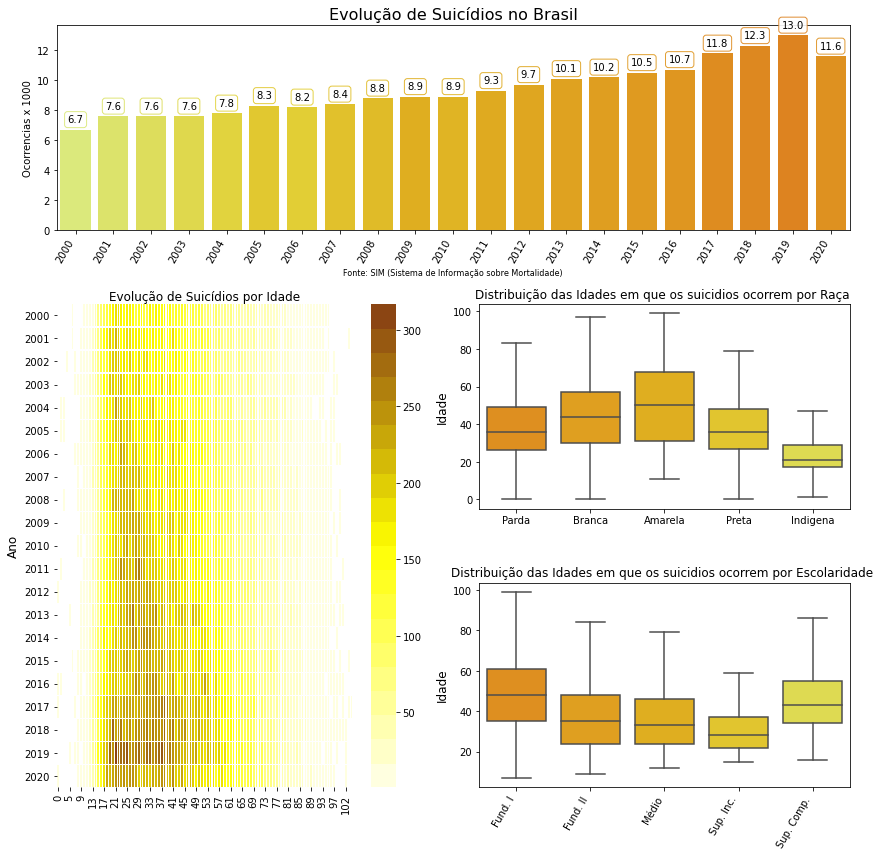

In [133]:
gridsize = (3,6)
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=6, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=3, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (1, 3), colspan=3, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (2, 3), colspan=3, rowspan=1)


###################################################################

ax1 = evolucao(ax1)
ax2 = idade3(ax2)
ax3 = racacor(ax3)
ax4 = escolaridadexidade(ax4)

fig.tight_layout()
